In [67]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
import numpy as np
import gmaps
import gmaps.datasets
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets.embed import embed_minimal_html
import warnings; warnings.filterwarnings("ignore")

In [234]:
data = pd.read_csv("datos_limpios_1.csv")
del data["Timestamp"]
del data["Unnamed: 0"]

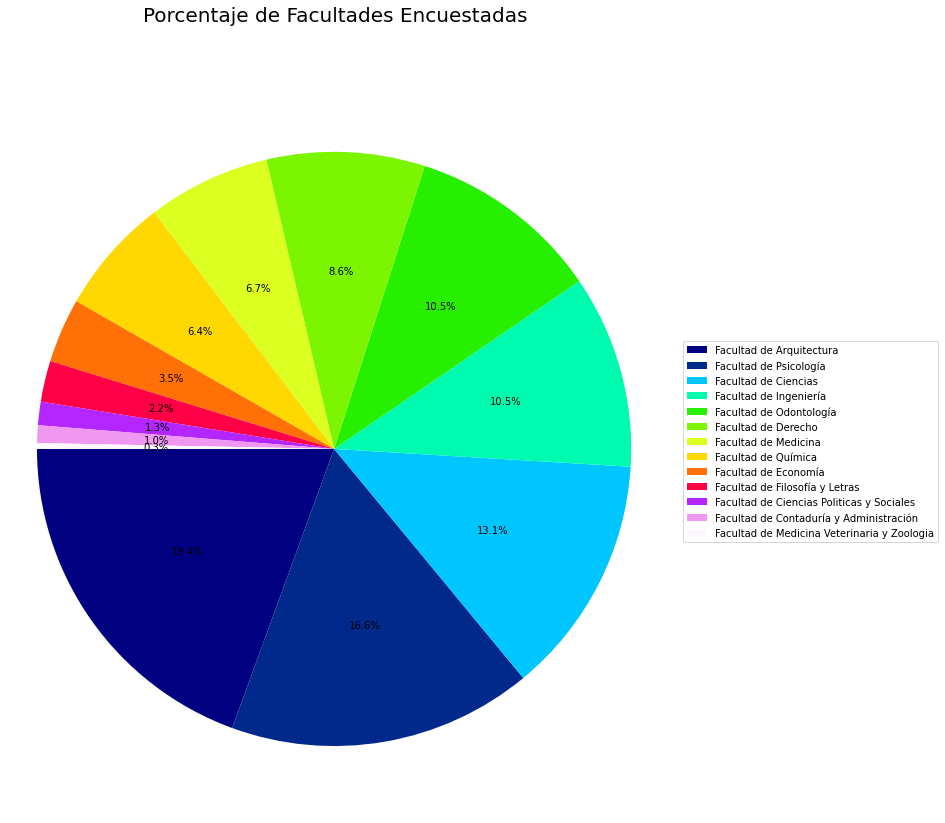

In [3]:
# Etiquetas de cada las distintas facultades
labels = data["Facultad "].value_counts().index.values.tolist()

# Frecuencia de cada facultad
sizes = data["Facultad "].value_counts().values

fig = plt.figure(figsize=(13, 13))

colores = np.linspace(0,1, len(labels))

plt.title("Porcentaje de Facultades Encuestadas", fontsize = 20, y = 1.08)

# Creación del diagrama de pastel
pie = plt.pie(sizes, autopct = '%1.1f%%', shadow = False, startangle = 180, colors = cm.get_cmap('gist_ncar')(colores))

plt.axis('equal') 

# Ajustamos la leyenda para que apareza a la derecha del diagrama de pasterl
plt.legend(pie[0], labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)

plt.subplots_adjust(left=0.0, bottom=0.1, right=0.7)
plt.show()

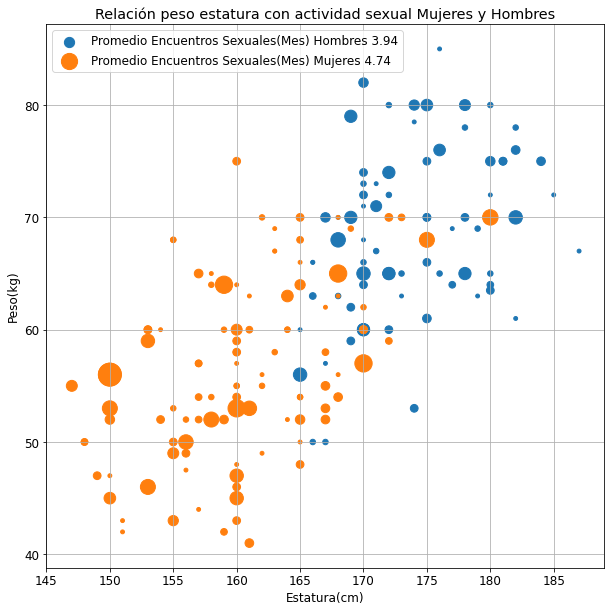

In [327]:
facultades = ['Facultad de Arquitectura',
 'Facultad de Psicología',
 'Facultad de Ciencias',
 'Facultad de Ingeniería',
 'Facultad de Odontología',]

generos = ["Masculino", "Femenino"]
columnas = ['Estatura(cm)', 'Peso(kg)', 'Frecuencia(Mes)']
fig = plt.figure(figsize = (10,10))
frecuencias = []
for genero in generos:
    estatura = data[data["Activo Sexualmente"] == "Sí"][data["Sexo"] == genero][columnas[0]].values
    peso = data[data["Activo Sexualmente"] == "Sí"][data["Sexo"] == genero][columnas[1]].values
    frecuencia = data[data["Activo Sexualmente"] == "Sí"][data["Sexo"] == genero][columnas[2]].values
    frecuencias.append(frecuencia.mean())
    plt.scatter(estatura, peso, s = 15*frecuencia)
    
plt.legend(["Promedio Encuentros Sexuales(Mes) Hombres {0:.3g}".format(frecuencias[0]), "Promedio Encuentros Sexuales(Mes) Mujeres {0:.3g}".format(frecuencias[1])])

plt.title("Relación peso estatura con actividad sexual Mujeres y Hombres")

plt.xlabel(columnas[0])
plt.ylabel(columnas[1])
plt.grid()
plt.show()

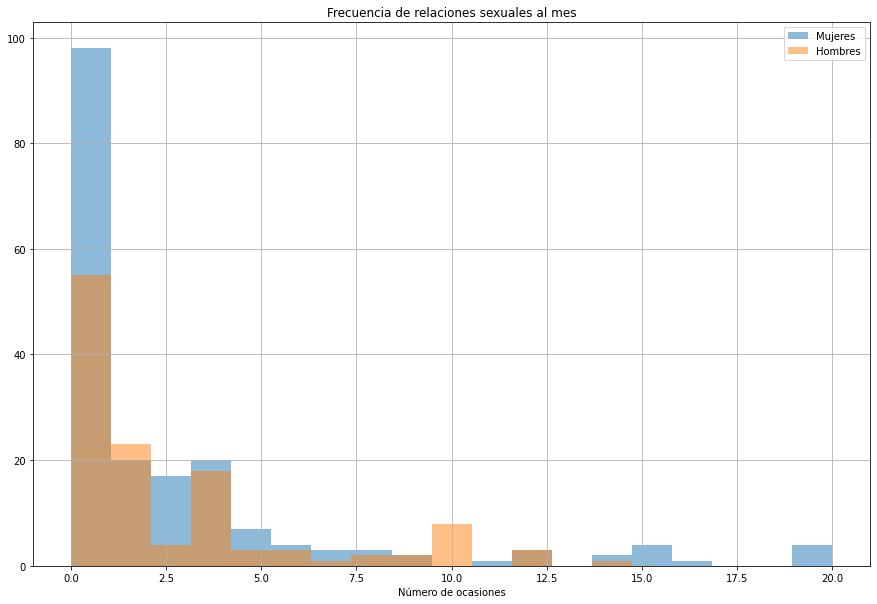

In [5]:
fig = plt.figure(figsize=(15,10))

# Definición del número de intervalos
bins = np.linspace(0, 20, 20)

mujeres = data[data["Sexo"] == "Femenino"]["Frecuencia(Mes)"].values
hombres = data[data["Sexo"] == "Masculino"]["Frecuencia(Mes)"].values
plt.hist(mujeres, bins, alpha=0.5, label='Mujeres')
plt.hist(hombres, bins, alpha=0.5, label='Hombres')

plt.title("Frecuencia de relaciones sexuales al mes")
plt.legend(loc='upper right')
plt.xlabel("Número de ocasiones")
plt.grid()
plt.show()

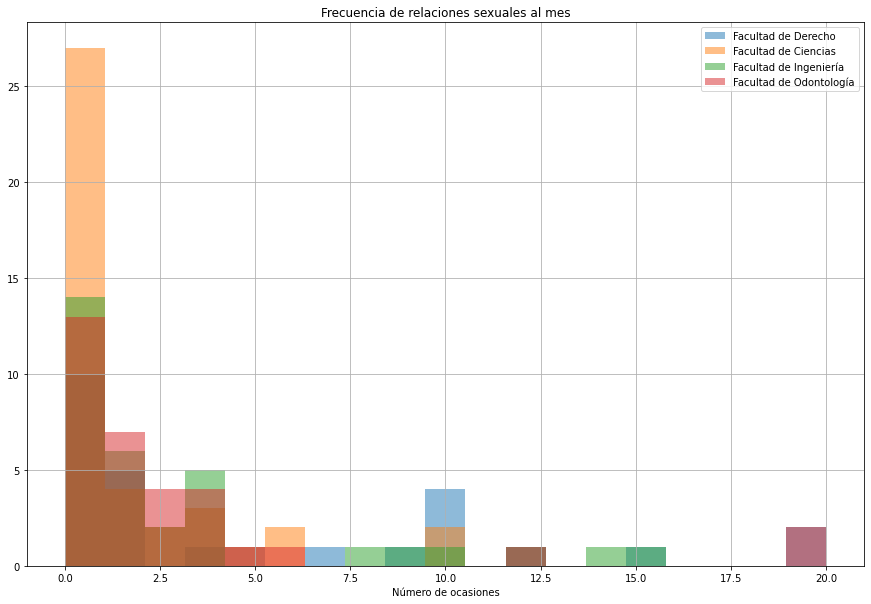

In [6]:
fig = plt.figure(figsize=(15,10))
bins = np.linspace(0, 20, 20)

etiquetas = ['Facultad de Derecho',
 'Facultad de Ciencias',
 'Facultad de Ingeniería',
 'Facultad de Odontología',]

for tag in etiquetas:
    temp = data[data["Facultad "] == tag]["Frecuencia(Mes)"].values
    plt.hist(temp, bins, alpha=0.5, label= tag)
plt.xlabel("Número de ocasiones")
plt.title("Frecuencia de relaciones sexuales al mes")
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [7]:
data.columns

Index(['Facultad ', 'Sexo', 'Edad', 'Semestre(número)', 'Orientación Sexual',
       'Religión', 'Estatura(cm)', 'Peso(kg)', 'Cantidad de Parejas Sexuales',
       'Edad Primera Vez', 'Activo Sexualmente', 'Frecuencia(Mes)',
       'Bachillerato de Origen', 'Hermanos Edades', 'Edad Padre',
       'Escolaridad Padre', 'Edad Madre', 'Escolaridad Madre', 'Delegación',
       'Has tenido relaciones con desconocidos',
       'Consumes bebidas alcohólicas', 'Frecuencia de consumo al mes(número)',
       'Consumes marihuana', 'Frecuencia al mes(número)', 'Hermana Mujer',
       'Hermano Hombre', 'Hijo Unico', 'Hermano Menor', 'Hermano Enmedio',
       'Hermano Mayor', 'Facultad .cat', 'Sexo.cat', 'Orientación Sexual.cat',
       'Religión.cat', 'Activo Sexualmente.cat', 'Bachillerato de Origen.cat',
       'Escolaridad Padre.cat', 'Escolaridad Madre.cat', 'Delegación.cat',
       'Has tenido relaciones con desconocidos.cat',
       'Consumes bebidas alcohólicas.cat', 'Consumes marihuana.cat',

In [8]:
fem_con_hermano = data[data['Sexo'] == 'Femenino'][data['Hermano Hombre'] == 1]['Activo Sexualmente']
fem_con_hermana = data[data['Sexo'] == 'Femenino'][data['Hermana Mujer'] == 1]['Activo Sexualmente']
fem_act = data[data['Sexo'] == 'Femenino']['Activo Sexualmente']

In [9]:
mas_con_hermana = data[data['Sexo'] == 'Masculino'][data['Hermana Mujer'] == 1]['Activo Sexualmente']
mas_con_hermano = data[data['Sexo'] == 'Masculino'][data['Hermano Hombre'] == 1]['Activo Sexualmente']
mas_act = data[data['Sexo'] == 'Masculino']['Activo Sexualmente']

In [10]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 12.0

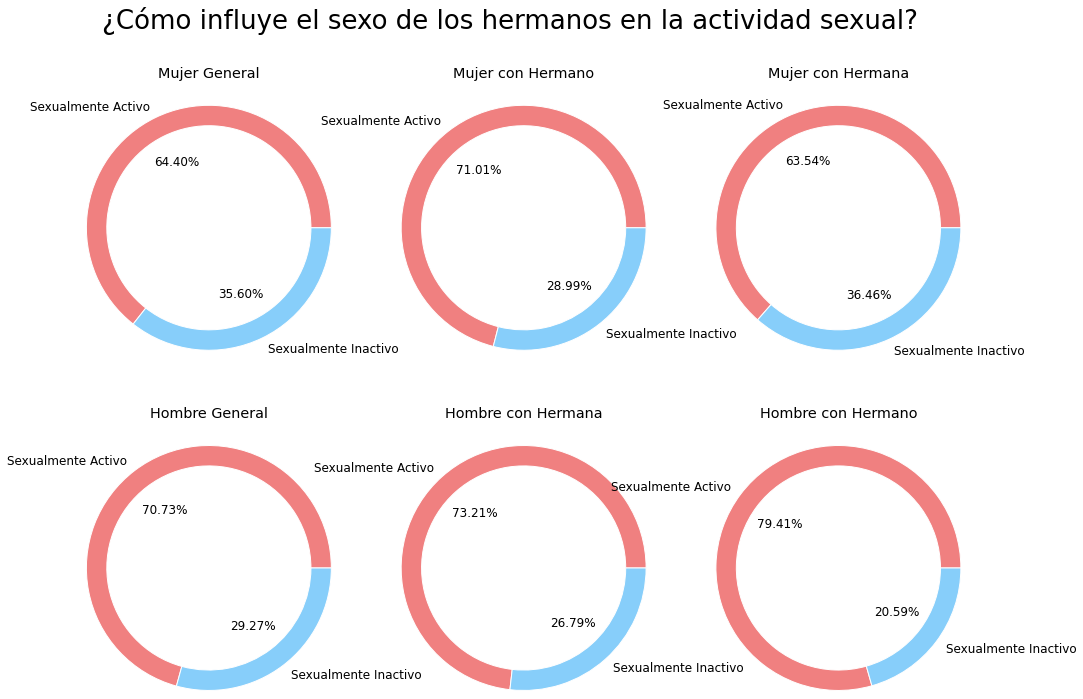

In [12]:
fig, axs = plt.subplots(2,3)
fig.set_size_inches(14.6, 10.5)
fig.suptitle('¿Cómo influye el sexo de los hermanos en la actividad sexual?', fontsize = 26) 

size = 0.3
val_f = fem_act.value_counts().values
vals_f = fem_con_hermano.value_counts().values
vals_fs = fem_con_hermana.value_counts().values

val_m = mas_act.value_counts().values
vals_m = mas_con_hermana.value_counts().values
vals_ms = mas_con_hermano.value_counts().values



cmap = plt.get_cmap("tab20c")

axs[0,0].pie(val_f, radius=1.8, colors=('lightcoral', 'lightskyblue'), labels = ('Sexualmente Activo', 'Sexualmente Inactivo'),
       wedgeprops=dict(width=size, edgecolor='w'), autopct = '%1.2f%%')

axs[0,0].set_title("Mujer General", y = 1.35)


axs[0,1].pie(vals_f, radius=1.8, colors=('lightcoral', 'lightskyblue'), labels = ('Sexualmente Activo', 'Sexualmente Inactivo'),
       wedgeprops=dict(width=size, edgecolor='w'), autopct = '%1.2f%%')

axs[0,1].set_title("Mujer con Hermano", y = 1.35)

axs[0,2].pie(vals_fs, radius=1.8, colors=('lightcoral', 'lightskyblue'), labels = ('Sexualmente Activo', 'Sexualmente Inactivo'),
       wedgeprops=dict(width=size, edgecolor='w'), autopct = '%1.2f%%')

axs[0,2].set_title("Mujer con Hermana", y = 1.35)


axs[1,0].pie(val_m, radius=1.8, colors=('lightcoral', 'lightskyblue'), labels = ('Sexualmente Activo', 'Sexualmente Inactivo'),
       wedgeprops=dict(width=size, edgecolor='w'), autopct = '%1.2f%%')

axs[1,0].set_title("Hombre General", y = 1.35)


axs[1,1].pie(vals_m, radius=1.8, colors=('lightcoral', 'lightskyblue'), labels = ('Sexualmente Activo', 'Sexualmente Inactivo'),
       wedgeprops=dict(width=size, edgecolor='w'), autopct = '%1.2f%%')

axs[1,1].set_title("Hombre con Hermana", y = 1.35)

axs[1,2].pie(vals_ms, radius=1.8, colors=('lightcoral', 'lightskyblue'), labels = ('Sexualmente Activo', 'Sexualmente Inactivo'),
       wedgeprops=dict(width=size, edgecolor='w'), autopct = '%1.2f%%')

axs[1,2].set_title("Hombre con Hermano", y = 1.35)



plt.subplots_adjust(hspace = 1, top = 0.8,wspace = 0.7)
plt.show()


Hombre con hermana: The chi-square statistic is 1.7101. The p-value is .190969. Not significant at p < .10.

In [313]:
calor = data[["Delegación", "Activo Sexualmente"]]
calor["Activo Sexualmente"] = calor["Activo Sexualmente"].apply(lambda s : 1 if s =="Sí" else 0)
alcaldias = pd.read_csv("alcaldias.csv").sort_values(by=['NOMBRE'])
calor.groupby(['Delegación']).sum()
mapa_calor = alcaldias[["Geo Point", "NOMBRE"]]

mapa_calor["actividad"] = calor.groupby(['Delegación']).sum()["Activo Sexualmente"].drop(["Estado de México", "Licenciatura"]).values

mapa_calor["latitud"] = mapa_calor["Geo Point"].apply(lambda s: float(s.split(",")[0]))
mapa_calor["longitud"] = mapa_calor["Geo Point"].apply(lambda s: float(s.split(",")[1]))
mapa_calor = mapa_calor.drop("Geo Point", axis = 1)

actividad_delegaciones = mapa_calor[["NOMBRE", "actividad"]].sort_values(by = ["actividad"], ascending = False)
temp = mapa_calor["actividad"]
mapa_calor["actividad"]= 300*(temp-temp.min())/(temp.max()-temp.min())

In [209]:
m = folium.Map([19.4326, -99.1332], zoom_start=10.65)
folium.TileLayer('stamentoner').add_to(m)
m.add_children(plugins.HeatMap(mapa_calor[["latitud","longitud","actividad"]].values, radius = 37, blur = 50))
m.save(outfile= "test.html")
m


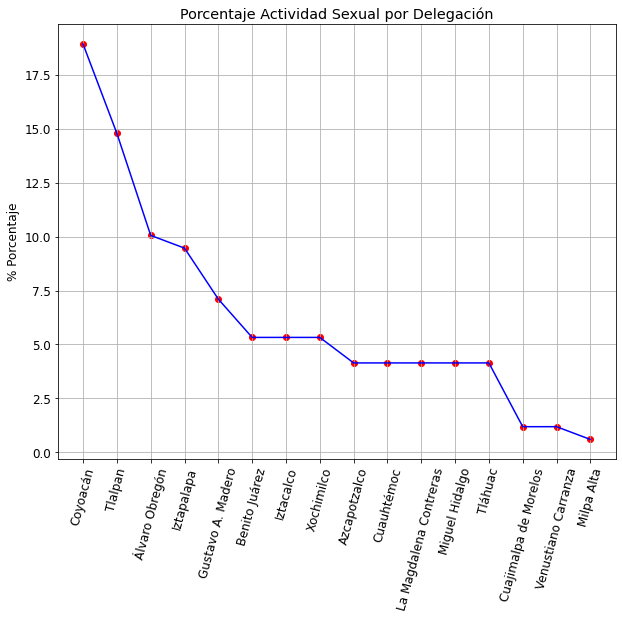

In [222]:
X = actividad_delegaciones["NOMBRE"]
y = 100*actividad_delegaciones["actividad"].values/actividad_delegaciones["actividad"].sum() 
fig = plt.figure(figsize = (10, 8))
plt.title("Porcentaje Actividad Sexual por Delegación")
plt.scatter(X, y, color = 'red')
plt.plot(X, y, color = 'blue')
plt.xticks(rotation = 75)
plt.ylabel("% Porcentaje")
plt.grid()
plt.show()

In [245]:
escm = data["Escolaridad Madre"].value_counts()
escp = data["Escolaridad Padre"].value_counts()

frecuencia_escm = [data[data["Escolaridad Madre"] == esc]["Frecuencia(Mes)"].mean() for esc in escm.index.values[:-1]]
frecuencia_escp = [data[data["Escolaridad Padre"] == esc]["Frecuencia(Mes)"].mean() for esc in escp.index.values[:-1]]



In [286]:
niveles = ['Secundaria', 'Bachillerato', 'Carrera Técnica', 'Licenciatura','Maestría', 'Doctorado']

In [299]:
escolaridades = []
for i in niveles[::-1]:
    escol = []
    for j in niveles:
        media = data[(data["Escolaridad Madre"] == i) & (data["Escolaridad Padre"] == j)]["Frecuencia(Mes)"].mean()
        escol.append(media)
    escolaridades.append(escol)

In [300]:
escolaridades

[[nan, nan, nan, 0.3333333333333333, 10.0, 5.857142857142857],
 [0.5, 0.5, 1.0, 3.3333333333333335, 4.375, 4.333333333333333],
 [1.0, 2.6363636363636362, 1.0, 2.7444444444444445, 3.6666666666666665, nan],
 [2.272727272727273, 3.125, 3.0, 1.9411764705882353, 0.0, 1.0],
 [1.7777777777777777, 3.466666666666667, 2.0, 4.421052631578948, 9.5, 0.0],
 [5.782608695652174, 2.5, 5.75, 1.2857142857142858, 1.0, nan]]

In [309]:
datos = np.nan_to_num(np.array(escolaridades))
datos[0,4] = datos.mean()
datos[4,4] = datos.mean()

In [310]:
datos = np.around(datos, decimals = 2)

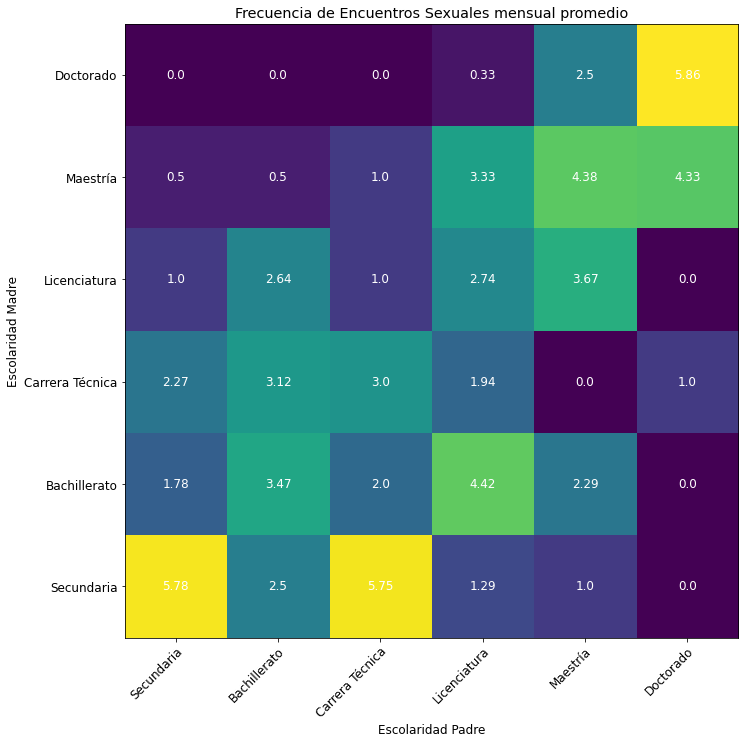

In [312]:
fig, ax = plt.subplots()
fig.set_size_inches(14.6, 10.5)
im = ax.imshow(datos)

ax.set_xticks(np.arange(len(niveles)))
ax.set_yticks(np.arange(len(niveles)))


ax.set_xticklabels(niveles)
ax.set_yticklabels(niveles[::-1])


plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(niveles)):
    for j in range(len(niveles)):
        text = ax.text(j, i, datos[i, j],ha="center", va="center", color="w")

ax.set_xlabel("Escolaridad Padre")
ax.set_ylabel("Escolaridad Madre")
ax.set_title("Frecuencia de Encuentros Sexuales mensual promedio")
fig.tight_layout()
plt.show()